In [452]:
import pandas as pd
# Loading the dataset
file_path = 'C:/Users/hanis/Desktop/assignment/socia media analytics/data/amazon.csv' 
df = pd.read_csv(file_path)

In [453]:
# Displaying the first few rows of the dataframe
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating_count  \
0       ₹1,099                 64%       24,269   
1         ₹349                 43%       43,994   

In [454]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating_count         1463 non-null   object
 7   about_product        1465 non-null   object
 8   user_id              1465 non-null   object
 9   user_name            1465 non-null   object
 10  review_id            1465 non-null   object
 11  rating               1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [455]:
#check duplicates 
duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating_count,about_product,user_id,user_name,review_id,rating,review_title,review_content,img_link,product_link


In [456]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
rating                 object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [457]:
# Stripping the symbols and commas, then converting all price fields from strings to floats
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)

# Displaying the converted columns to verify changes
df[['discounted_price', 'actual_price']].head()


,discounted_price,actual_price
0,399.0,1099.0
1,199.0,349.0
2,199.0,1899.0
3,329.0,699.0
4,154.0,399.0


In [458]:
# Calculating discount percentages
df['discount_percentage'] = ((df['actual_price']-df['discounted_price'])/df['actual_price']) * 100
df[['discounted_price', 'actual_price', 'discount_percentage']].head()


,discounted_price,actual_price,discount_percentage
0,399.0,1099.0,63.694268
1,199.0,349.0,42.979943
2,199.0,1899.0,89.520800
3,329.0,699.0,52.932761
4,154.0,399.0,61.403509


In [459]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
rating                 0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [460]:
# Convert 'rating_count' to numeric after removing commas and handling non-numeric characters, filling missing values with zero
df['rating_count'] = df['rating_count'].replace('[,]', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0)

# Display the updated 'rating_count' column to verify changes
df[['rating_count']].head()


,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0


In [461]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
rating                 0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [462]:
import nltk
import re

# Downloading necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

#text cleaning function
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Removing non-alphabet characters and convertingb to lower case
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize, remove stopwords, and lemmatize
    tokens = nltk.word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(lemmatized)
# Assuming 'df' is your DataFrame and 'review_content' is the column name
df['review_content_clean'] = df['review_content'].apply(clean_text)

# Display the cleaned 'review_content' to verify changes
df[['review_content', 'review_content_clean']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review_content,review_content_clean
0,Looks durable Charging is fine tooNo complains...,look durable charging fine toono complains cha...
1,I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...
2,"Not quite durable and sturdy,https://m.media-a...",quite durable sturdy http medium amazon com im...
3,"Good product,long wire,Charges good,Nice,I bou...",good product long wire charge good nice bought...
4,"Bought this instead of original apple, does th...",bought instead original apple work r fast appl...


In [463]:
# Dropping the columns that are not necessary for the analysis
columns_to_drop = ['user_id', 'user_name', 'review_id', 'img_link', 'product_link', 'about_product']
df = df.drop(columns=columns_to_drop)

df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating_count,rating,review_title,review_content,review_content_clean
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,24269.0,4.2,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complains cha...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,43994.0,4,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,7928.0,3.9,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",quite durable sturdy http medium amazon com im...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,94363.0,4.2,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",good product long wire charge good nice bought...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.403509,16905.0,4.2,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",bought instead original apple work r fast appl...


In [464]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.684924,18270.564505
std,6944.304394,10874.826864,21.636267,42729.995315
min,39.000000,39.000000,0.000000,0.000000
25%,325.000000,800.000000,32.001280,1173.000000
50%,799.000000,1650.000000,50.016672,5178.000000
75%,1999.000000,4295.000000,62.885714,17325.000000
max,77990.000000,139900.000000,94.118824,426973.000000


In [465]:
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
#split categories 

df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating_count,rating,review_title,review_content,review_content_clean,sub_category,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,24269.0,4.2,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complains cha...,USBCables,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,43994.0,4,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...,USBCables,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,7928.0,3.9,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",quite durable sturdy http medium amazon com im...,USBCables,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,94363.0,4.2,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",good product long wire charge good nice bought...,USBCables,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.403509,16905.0,4.2,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",bought instead original apple work r fast appl...,USBCables,Computers&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,58.759521,1090.0,4,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",received product without spanner excellent pro...,WaterPurifierAccessories,Home&Kitchen
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.123153,4118.0,4.1,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",ok got everything mentioned measuring cup brok...,Rice&PastaCookers,Home&Kitchen
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,27.954545,468.0,3.6,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",plastic cool body u find sturdy surface put ve...,HeatConvectors,Home&Kitchen
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,25.978836,8031.0,4,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,installed kitchen working fine fan speed slow ...,ExhaustFans,Home&Kitchen


In [467]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating_count', 'rating',
       'review_title', 'review_content', 'review_content_clean',
       'sub_category', 'main_category'],
      dtype='object')

In [468]:
#Top main categories in reviews
df.groupby(['main_category'])['rating_count'].sum().nlargest(10)

main_category
Electronics              15778848.0
Computers&Accessories     7728689.0
Home&Kitchen              2991069.0
OfficeProducts             149675.0
MusicalInstruments          88882.0
Toys&Games                  15867.0
HomeImprovement              8566.0
Health&PersonalCare          3663.0
Car&Motorbike                1118.0
Name: rating_count, dtype: float64

Text(0.5, 1.0, 'Top main categories by rating count')

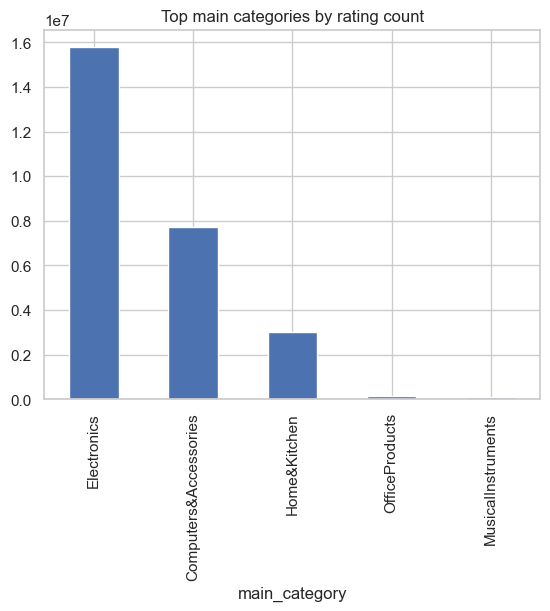

In [469]:
df.groupby(['main_category'])['rating_count'].sum().nlargest(5).plot(kind='bar')
plt.title('Top main categories by rating count')

Text(0.5, 1.0, 'Top main categoties by discount')

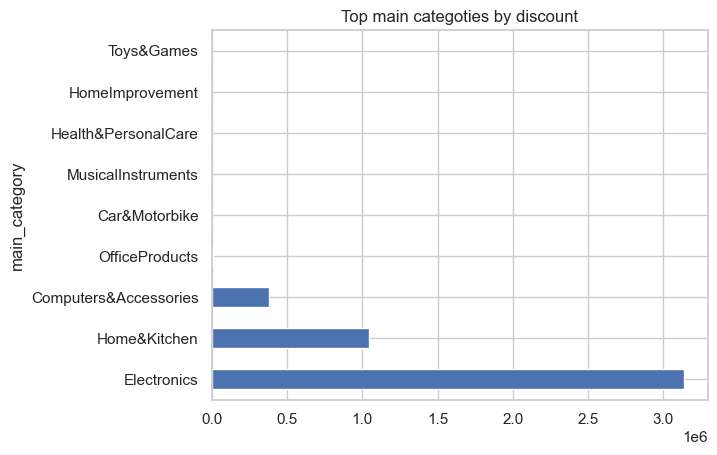

In [470]:
df.groupby(['main_category'])['discounted_price'].sum().nlargest(10).plot(kind='barh')
plt.title('Top main categoties by discount')

In [471]:
# Check the data type of the 'rating' column
print(df['rating'].dtype)

# If it's not numeric, convert it
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


object


In [472]:
df.groupby(['sub_category','main_category'])['rating'].sum().nlargest(10)

sub_category      main_category        
USBCables         Computers&Accessories    967.4
SmartWatches      Electronics              305.9
Smartphones       Electronics              278.8
SmartTelevisions  Electronics              265.2
In-Ear            Electronics              202.7
RemoteControls    Electronics              186.2
MixerGrinders     Home&Kitchen             108.3
Mice              Computers&Accessories    102.9
HDMICables        Electronics              102.1
DryIrons          Home&Kitchen              99.1
Name: rating, dtype: float64

Text(0.5, 1.0, 'top 10 sub categories by rating')

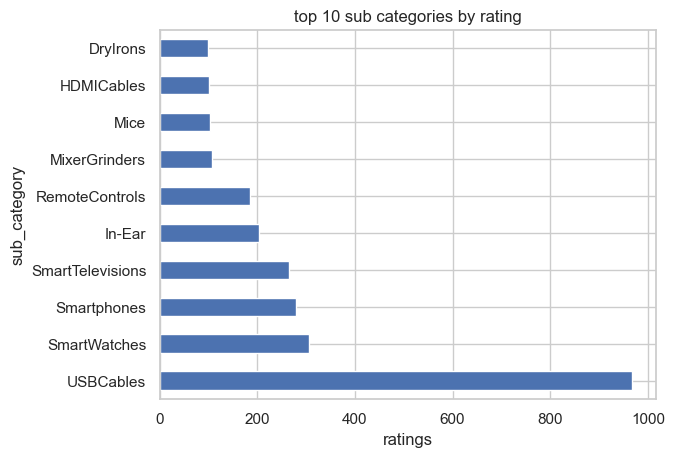

In [473]:
df.groupby(['sub_category'])['rating'].sum().nlargest(10).plot(kind='barh')
plt.xlabel('ratings')
plt.title('top 10 sub categories by rating')

In [474]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

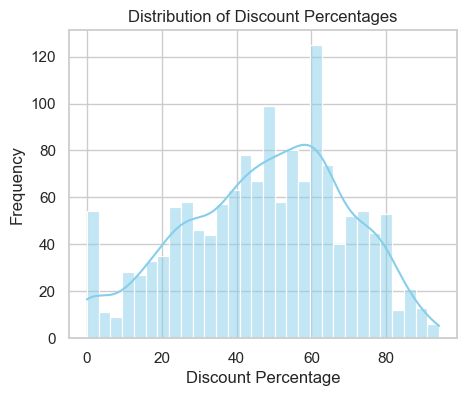

In [475]:
# Create the plot for Discount Percentage Distribution
plt.figure(figsize=(5,4))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [476]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure the VADER lexicon is available
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()# Download the VADER lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hanis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [477]:
# Define a function to get the compound sentiment score for each review
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to calculate sentiment scores
df['sentiment_score'] = df['review_content_clean'].apply(get_sentiment)

# Display the DataFrame with the new 'sentiment_score' column
print(df[['product_name', 'review_content_clean', 'sentiment_score']].head())


                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                review_content_clean  sentiment_score  
0  look durable charging fine toono complains cha...           0.9614  
1  ordered cable connect phone android auto car c...           0.9909  
2  quite durable sturdy http medium amazon com im...           0.9001  
3  good product long wire charge good nice bought...           0.9788  
4  bought instead original apple work r fast appl...           0.9962  


In [478]:
print(df[['sentiment_score', 'discount_percentage', 'rating', 'rating_count']].dtypes)


sentiment_score        float64
discount_percentage    float64
rating                 float64
rating_count           float64
dtype: object


In [479]:
# Convert columns to numeric, errors='coerce' will set invalid parsing as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)  # This removes rows where 'rating' is NaN

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df[['sentiment_score', 'discount_percentage', 'rating', 'rating_count']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                      sentiment_score  discount_percentage    rating  \
sentiment_score             1.000000            -0.007705  0.201647   
discount_percentage        -0.007705             1.000000 -0.155439   
rating                      0.201647            -0.155439  1.000000   
rating_count                0.060097             0.009890  0.101584   

                     rating_count  
sentiment_score          0.060097  
discount_percentage      0.009890  
rating                   0.101584  
rating_count             1.000000  


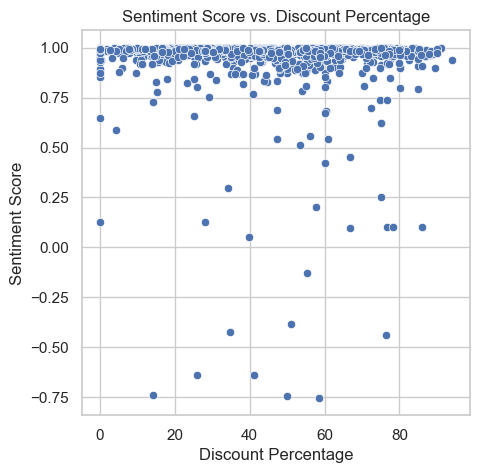

In [481]:
# Visualization: Scatter plot of Sentiment Score vs. Discount Percentage
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='discount_percentage', y='sentiment_score')
plt.title('Sentiment Score vs. Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

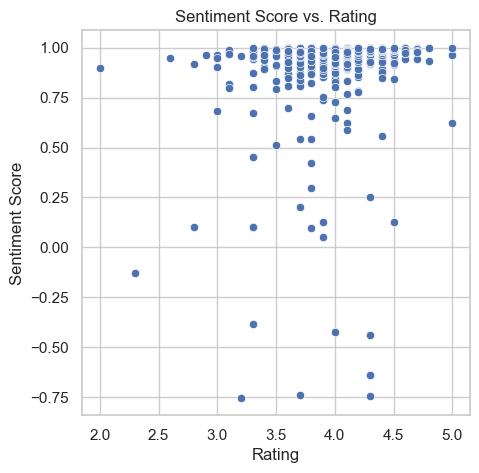

In [482]:
# Visualization: Sentiment Score vs. Rating
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='rating', y='sentiment_score')
plt.title('Sentiment Score vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

In [483]:
from tqdm.notebook import tqdm
# Calculate sentiment scores
results = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    scores = sia.polarity_scores(row['review_content'])
    scores['product_id'] = row['product_id']
    results.append(scores)

# Create a DataFrame with the results
sentiment_df = pd.DataFrame(results)

C:\Users\hanis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\hanis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\hanis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\hanis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/1464 [00:00<?, ?it/s]

In [484]:
sentiment_df 

,neg,neu,pos,compound,product_id
0,0.032,0.744,0.224,0.9033,B07JW9H4J1
1,0.010,0.821,0.169,0.9853,B098NS6PVG
2,0.000,0.641,0.359,0.6808,B096MSW6CT
3,0.028,0.800,0.172,0.8316,B08HDJ86NZ
4,0.116,0.719,0.165,0.9809,B08CF3B7N1
...,...,...,...,...,...
1459,0.016,0.763,0.221,0.9468,B08L7J3T31
1460,0.122,0.714,0.164,0.7876,B01M6453MB
1461,0.083,0.718,0.199,0.9698,B009P2LIL4
1462,0.061,0.882,0.057,-0.2960,B00J5DYCCA


In [485]:
# Categorize the compound scores
def categorize_sentiment(compound):
    if compound > 0:
        return 'positive'
        
    else:
        return 'negative'
sentiment_df['sentiment_category'] = sentiment_df['compound'].apply(categorize_sentiment)


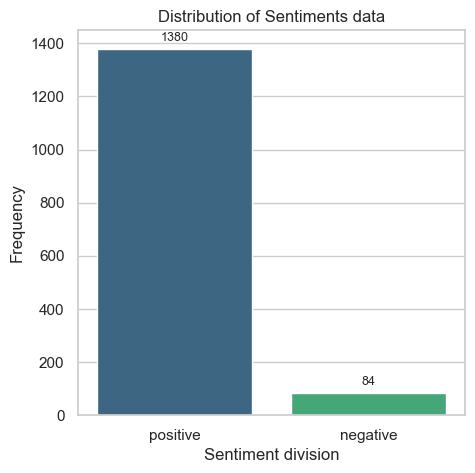

In [486]:
# Count the number of each sentiment category
sentiment_counts = sentiment_df['sentiment_category'].value_counts()

# Plotting the distribution of sentiments
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(5, 5))
bars = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', 
                  size=9, xytext=(0, 8),
                  textcoords='offset points')

plt.title('Distribution of Sentiments data')
plt.xlabel('Sentiment division')
plt.ylabel('Frequency')
plt.show()

In [487]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [488]:
# Filter the DataFrame for positive and negative sentiments
positive_text = ' '.join(df[df['sentiment_score'] > 0]['review_content_clean'])
negative_text = ' '.join(df[df['sentiment_score'] < 0]['review_content_clean'])

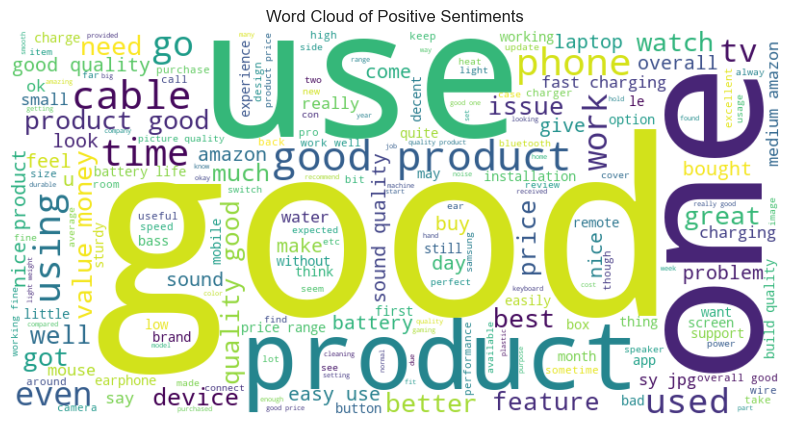

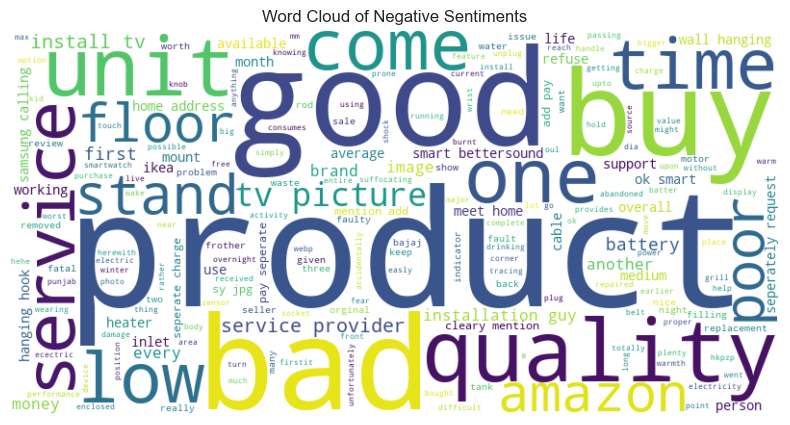

In [489]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for positive sentiment
generate_wordcloud(positive_text, 'Word Cloud of Positive Sentiments')

# Generate word cloud for negative sentiment
generate_wordcloud(negative_text, 'Word Cloud of Negative Sentiments')


In [490]:
pip install gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [491]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenize and remove stop words
    words = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    return words

# Apply preprocessing to the review content
df['processed_content'] = df['review_content_clean'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [492]:
from gensim import corpora, models

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(df['processed_content'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_content']]

# Set the number of topics
num_topics = 5

# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Print the topics found by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.045*"cable" + 0.028*"charging" + 0.014*"fast" + 0.012*"work" + 0.012*"amazon" + 0.012*"usb" + 0.010*"image" + 0.010*"charge" + 0.010*"nice" + 0.009*"working"
Topic: 1 
Words: 0.025*"tv" + 0.010*"remote" + 0.009*"mouse" + 0.009*"installation" + 0.008*"picture" + 0.008*"working" + 0.008*"work" + 0.008*"service" + 0.008*"sound" + 0.007*"amazon"
Topic: 2 
Words: 0.024*"sound" + 0.012*"earphone" + 0.012*"bass" + 0.012*"battery" + 0.011*"ear" + 0.010*"boat" + 0.009*"like" + 0.008*"also" + 0.008*"noise" + 0.008*"headphone"
Topic: 3 
Words: 0.027*"phone" + 0.020*"watch" + 0.016*"battery" + 0.016*"camera" + 0.010*"feature" + 0.010*"day" + 0.009*"screen" + 0.009*"also" + 0.008*"like" + 0.007*"display"
Topic: 4 
Words: 0.018*"easy" + 0.009*"like" + 0.009*"also" + 0.008*"nice" + 0.008*"time" + 0.007*"water" + 0.007*"using" + 0.007*"work" + 0.007*"get" + 0.006*"used"


In [493]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [494]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare visualization
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display
pyLDAvis.display(lda_display)
